In [1]:
import pandas as pd
import os
import json
import re

def read_results_to_dataframe(results_dir='results_init'):
    # Initialize an empty list to store the results
    results = []

    # Regex pattern to extract cores from the filename
    pattern = re.compile(r'result_cores_(\d+)_')

    # Iterate over all files in the results directory
    for filename in os.listdir(results_dir):
        if filename.endswith('.json'):
            # Extract cores count from the filename
            match = pattern.search(filename)
            if match:
                cores = int(match.group(1))
            else:
                cores = None

            file_path = os.path.join(results_dir, filename)
            # Read the JSON file
            with open(file_path, 'r') as file:
                for line in file:
                    result = json.loads(line)
                    result['cores'] = cores
                    results.append(result)

    # Convert the list of results to a DataFrame
    df = pd.DataFrame(results)

    return df

# Usage
df = read_results_to_dataframe()
print(df)


     population_size  total_generations  mutation_rate  tournament_size  \
0                500                 50           0.10               10   
1                100                200           0.05               10   
2                100                 48           0.05                5   
3                250                200           0.10               50   
4                100                 48           0.01               10   
..               ...                ...            ...              ...   
571              100                200           0.10               50   
572              500                200           0.05                5   
573              250                 50           0.05               10   
574              250                 48           0.10                5   
575              250                 50           0.01               10   

     initial_cost  best_route_length  elapsed_time  cores  
0      229.804736         204.313856   

/var/folders/41/jks7nyyn6433ckh2kqf00tjc0000gn/T/ipykernel_13289/2360532653.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
def find_best_parameters_by_cores(df):
    # Group by 'cores' and find the index of the minimum 'best_route_length' for each group
    idx = df.groupby('cores')['best_route_length'].idxmin()
    # Use the indices to get the rows with the best parameters for each cores group
    best_parameters_df = df.loc[idx]
    # Sort the resulting DataFrame by 'elapsed_time'
    best_parameters_df = best_parameters_df.sort_values(by='elapsed_time')
    return best_parameters_df

best_params_by_cores = find_best_parameters_by_cores(df)
print("\nBest parameters by cores group:")
print(best_params_by_cores)


Best parameters by cores group:
     population_size  total_generations  mutation_rate  tournament_size  \
503              500                200            0.1               50   
172              500                200            0.2               50   
209              500                200            0.2               50   
391              500                200            0.2               50   

     initial_cost  best_route_length  elapsed_time  cores  
503    227.969922         203.489909     49.038350      8  
172    228.610461         189.265608     66.625455      4  
209    227.373230         168.935239     89.276963      2  
391    228.138936         142.842416    164.121701      1  


In [3]:
def find_best_parameters_by_cores_and_cities(df):
    # Calculate a combined score: Normalize 'best_route_length' and 'elapsed_time', then sum
    df['normalized_best_route_length'] = (df['best_route_length'] - df['best_route_length'].min()) / (df['best_route_length'].max() - df['best_route_length'].min())
    df['normalized_elapsed_time'] = (df['elapsed_time'] - df['elapsed_time'].min()) / (df['elapsed_time'].max() - df['elapsed_time'].min())
    df['combined_score'] = df['normalized_best_route_length'] + df['normalized_elapsed_time']

    # Group by 'cores' and 'num_cities' and find the index of the minimum 'combined_score' for each group
    idx = df.groupby(['cores', 'num_cities'])['combined_score'].idxmin()
    
    # Use the indices to get the rows with the best parameters for each group
    best_parameters_df = df.loc[idx]
    
    # Sort the resulting DataFrame by 'combined_score' for better readability
    best_parameters_df = best_parameters_df.sort_values(by='combined_score')
    
    return best_parameters_df

# Usage
df = read_results_to_dataframe('results_005_25')
best_params_by_cores_and_cities = find_best_parameters_by_cores_and_cities(df)
print("\nBest parameters by cores and cities group:")
print(best_params_by_cores_and_cities)



Best parameters by cores and cities group:
     num_cities  population_size  total_generations  mutation_rate  \
69          100              100                300           0.05   
178         100              100                800           0.05   
115         100              250                400           0.05   
99          100              100               1600           0.05   
144         200              100                200           0.05   
171         200              100                800           0.05   
133         200               50               1200           0.05   
108         200              100               1600           0.05   
216         300              100                800           0.05   
45          300              100                500           0.05   
101         300              100               1200           0.05   
22          300              100               1600           0.05   
202         400              100              

In [4]:
def find_best_parameters_by_cores_and_cities(df):
    # Calculate a combined score: Normalize 'best_route_length' and 'elapsed_time', then sum
    df['normalized_best_route_length'] = (df['best_route_length'] - df['best_route_length'].min()) / (df['best_route_length'].max() - df['best_route_length'].min())
    df['normalized_elapsed_time'] = (df['elapsed_time'] - df['elapsed_time'].min()) / (df['elapsed_time'].max() - df['elapsed_time'].min())
    df['combined_score'] = df['normalized_best_route_length'] + df['normalized_elapsed_time']

    # Group by 'cores' and 'num_cities' and find the index of the minimum 'combined_score' for each group
    idx = df.groupby(['cores', 'num_cities'])['combined_score'].idxmin()
    
    # Use the indices to get the rows with the best parameters for each group
    best_parameters_df = df.loc[idx]
    
    # Sort the resulting DataFrame by 'combined_score' for better readability
    best_parameters_df = best_parameters_df.sort_values(by='combined_score')
    
    return best_parameters_df

# Usage
df = read_results_to_dataframe('results_02_50')
best_params_by_cores_and_cities = find_best_parameters_by_cores_and_cities(df)
print("\nBest parameters by cores and cities group:")
print(best_params_by_cores_and_cities)



Best parameters by cores and cities group:
     num_cities  population_size  total_generations  mutation_rate  \
203         100              100                400            0.2   
39          100              100               1200            0.2   
69          100              100                300            0.2   
99          100              100               1600            0.2   
84          200              100                500            0.2   
111         200              100                600            0.2   
29          200              100               1200            0.2   
108         200              100               1600            0.2   
45          300              100                500            0.2   
23          300              100                600            0.2   
101         300              100               1200            0.2   
22          300              100               1600            0.2   
68          400              100              

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/41/jks7nyyn6433ckh2kqf00tjc0000gn/T/ipykernel_13289/1248214313.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cores', y='best_route_length', data=best_params_df, palette='viridis')


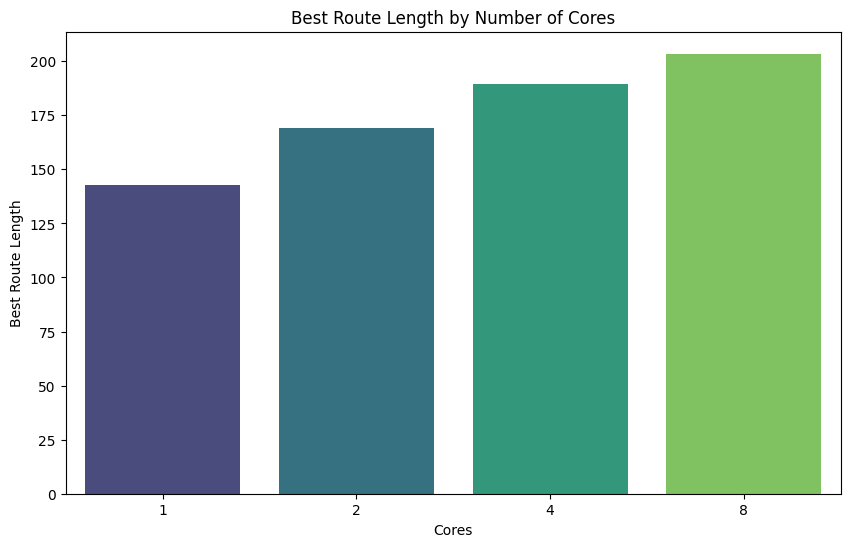

In [8]:
def plot_best_parameters_by_cores(best_params_df):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='cores', y='best_route_length', data=best_params_df, palette='viridis')
    plt.title('Best Route Length by Number of Cores')
    plt.xlabel('Cores')
    plt.ylabel('Best Route Length')
    plt.show()

plot_best_parameters_by_cores(best_params_by_cores)


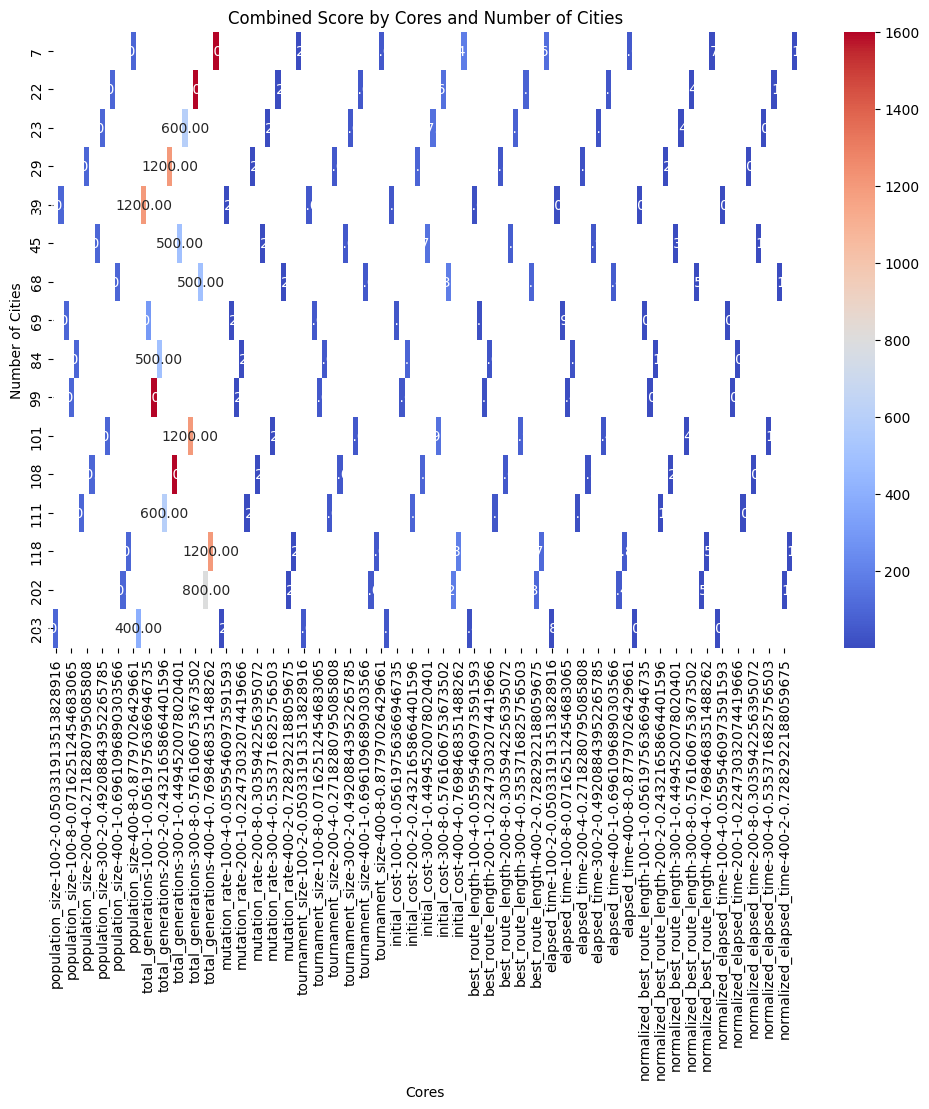

In [12]:
def plot_best_parameters_by_cores_and_cities(best_params_df):
    pivot_table = best_params_df.pivot(columns=['num_cities', 'cores', 'combined_score'])
    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Combined Score by Cores and Number of Cities')
    plt.xlabel('Cores')
    plt.ylabel('Number of Cities')
    plt.show()

plot_best_parameters_by_cores_and_cities(best_params_by_cores_and_cities)


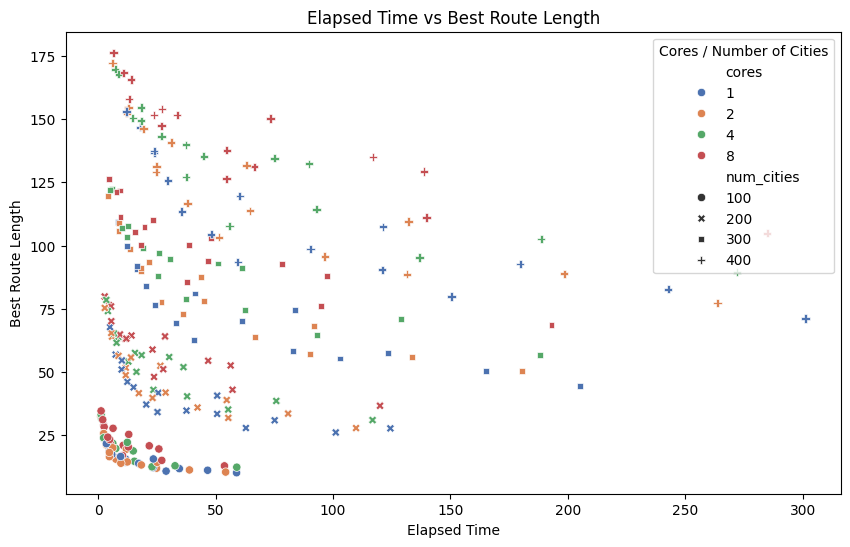

In [13]:
def plot_elapsed_time_vs_route_length(df):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='elapsed_time', y='best_route_length', hue='cores', style='num_cities', palette='deep', data=df)
    plt.title('Elapsed Time vs Best Route Length')
    plt.xlabel('Elapsed Time')
    plt.ylabel('Best Route Length')
    plt.legend(title='Cores / Number of Cities')
    plt.show()

plot_elapsed_time_vs_route_length(df)


In [ ]:
def plot_elapsed_time_vs_route_length(df):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='elapsed_time', y='best_route_length', hue='cores', style='num_cities', palette='deep', data=df)
    plt.title('Elapsed Time vs Best Route Length')
    plt.xlabel('Elapsed Time')
    plt.ylabel('Best Route Length')
    plt.legend(title='Cores / Number of Cities')
    plt.show()

plot_elapsed_time_vs_route_length(df)


In [15]:
def calculate_speedup(df, baseline_core=1):
    baseline_time = df[df['cores'] == baseline_core]['elapsed_time'].mean()
    df['speedup'] = baseline_time / df['elapsed_time']
    df['efficiency'] = df['speedup'] / df['cores']
    return df

df = calculate_speedup(df)
df.head()

,num_cities,population_size,total_generations,mutation_rate,tournament_size,initial_cost,best_route_length,elapsed_time,cores,normalized_best_route_length,normalized_elapsed_time,combined_score,speedup,efficiency
0,100,500,1600,0.2,50,40.981277,12.804396,53.800339,8,0.016269,0.175361,0.191630,1.012322,0.126540
1,400,250,800,0.2,50,187.399012,131.163207,66.480364,8,0.728450,0.217647,0.946097,0.819239,0.102405
2,200,250,800,0.2,50,85.693335,31.797031,55.454424,2,0.130550,0.180877,0.311428,0.982127,0.491063
3,100,500,600,0.2,50,41.487723,11.200228,38.903418,2,0.006617,0.125683,0.132299,1.399961,0.699981
4,200,500,200,0.2,50,87.997223,52.409371,26.530340,2,0.254577,0.084421,0.338998,2.052868,1.026434


In [18]:
from scipy.optimize import curve_fit

def amdahls_law(N, P):
    return 1 / ((1 - P) + (P / N))

core_counts = df['cores'].unique()
observed_speedups = df.groupby('cores')['speedup'].mean().values

# Curve fitting to find the best P
popt, _ = curve_fit(amdahls_law, core_counts, observed_speedups)
P_optimal = popt[0]

print(f"Optimal parallelizable portion (P): {P_optimal:.4f}")


Optimal parallelizable portion (P): 0.8864


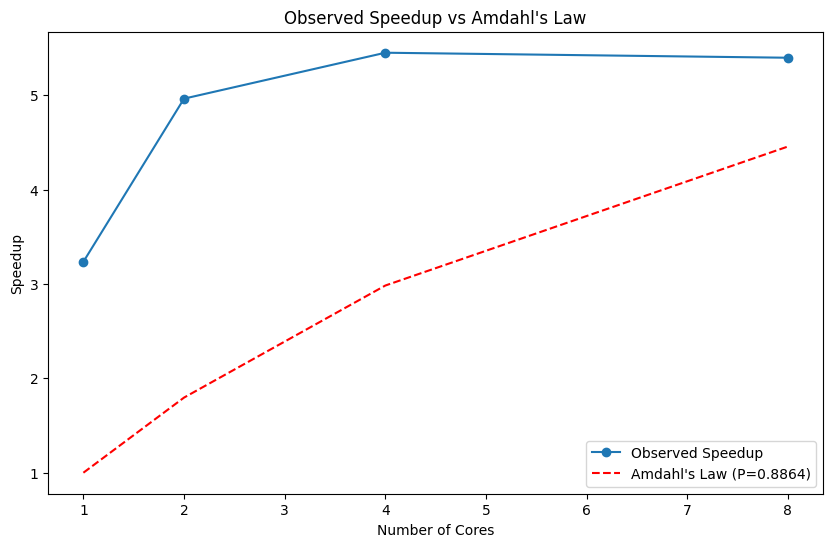

In [19]:
def plot_amdahls_law(df, P_optimal):
    core_counts = sorted(df['cores'].unique())
    observed_speedups = df.groupby('cores')['speedup'].mean().values

    plt.figure(figsize=(10, 6))
    plt.plot(core_counts, observed_speedups, 'o-', label='Observed Speedup')
    plt.plot(core_counts, amdahls_law(core_counts, P_optimal), 'r--', label=f"Amdahl's Law (P={P_optimal:.4f})")
    plt.xlabel('Number of Cores')
    plt.ylabel('Speedup')
    plt.title('Observed Speedup vs Amdahl\'s Law')
    plt.legend()
    plt.show()

plot_amdahls_law(df, P_optimal)
